Hello and welcome to training. This is the teaching module of the AI!
CURRENT MODEL: <keras.engine.sequential.Sequential object at 0x7fa21c361f10>
Choose the size of grid5
How many needed to win (2-5)?3
Do you want to test your previously created model (no training)? (y/n)n
Set number of trials(min.1000):400
Do you want test prints of tables after each game? (y/n)n


IntProgress(value=0, description='Progress:', max=400, style=ProgressStyle(description_width='initial'))

game number  0
Generating random games!
+---+---+---+---+---+
| X |   | X |   | O |
+---+---+---+---+---+
| X |   |   | X |   |
+---+---+---+---+---+
|   | O |   | O |   |
+---+---+---+---+---+
| X | O | O |   |   |
+---+---+---+---+---+
|   |   |   | O | X |
+---+---+---+---+---+
Iteration 1, remaining time: 4214.59 seconds
Elapsed time:  10.566351890563965


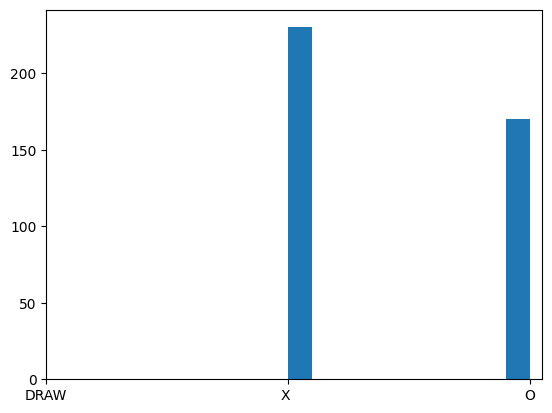

Total wins
X: 230
O (AI): 170
Draw: 0
TRIALS ARE OVER. DO YOU WANT TO TEACH THE AI? (y/n)y
Epoch 1/100
7/7 [==============================] - 2s 41ms/step - loss: 0.8086 - acc: 0.5616 - val_loss: 0.7228 - val_acc: 0.5494
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6958 - acc: 0.5915 - val_loss: 0.7099 - val_acc: 0.5333
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6730 - acc: 0.6036 - val_loss: 0.7139 - val_acc: 0.5264
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6576 - acc: 0.6300 - val_loss: 0.7159 - val_acc: 0.5287
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6515 - acc: 0.6318 - val_loss: 0.7109 - val_acc: 0.5276
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6291 - acc: 0.6430 - val_loss: 0.7220 - val_acc: 0.5241
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6248 - acc: 0.6467 - val_loss: 0.7193 - val_acc: 0.5230
E

7/7 [==============================] - 0s 10ms/step - loss: 0.2307 - acc: 0.8915 - val_loss: 1.1946 - val_acc: 0.5678
Epoch 64/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2480 - acc: 0.8792 - val_loss: 1.2002 - val_acc: 0.5529
Epoch 65/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2377 - acc: 0.8892 - val_loss: 1.1812 - val_acc: 0.5759
Epoch 66/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2214 - acc: 0.8913 - val_loss: 1.2864 - val_acc: 0.5770
Epoch 67/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2204 - acc: 0.8921 - val_loss: 1.2136 - val_acc: 0.5598
Epoch 68/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2226 - acc: 0.8987 - val_loss: 1.2557 - val_acc: 0.5839
Epoch 69/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2310 - acc: 0.8913 - val_loss: 1.2176 - val_acc: 0.5529
Epoch 70/100
7/7 [==============================] - 0s 9ms/step - loss: 0.2109 - acc: 0.9022 - v

KeyboardInterrupt: Interrupted by user

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import copy
import sys
from io import StringIO
from tabulate import tabulate
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.backend import reshape
from keras.utils.np_utils import to_categorical
from keras.models import load_model
import time
start_time = time.time()


print("Hello and welcome to training. This is the teaching module of the AI!")

'''
        #THE TIC TAC TOE - GAME TEACHING MODULE!#
        
        ---------
        |X||_|X|
        |O||O|O|
        |X||_|X|
        ----------        
        
        Welcome to teaching module. Here is a description of the routine. Subroutines are described separately.
        Some subroutines are the same as in game module. The possibilities are:
            a) Run the simulation for training with random games with desired board sizes.
            b) Run the simulation with trained model.
            Note! The training has to be run before running simulation with trained model.
        
        
        In the main program the following routine is executed:
        
        Settings:
        0)  Find out if there is an active, existing model to be used
        1)  Load all  packages and subroutines
        2)  Inquiries. Setting the size of the board and required symbols to win the game.
        3)  Trials loop. Runs the trials.

                |                      
                |                             OVERVIEW OF THE TRAINING
                |                           ************************
                |                                 
                |                
                V                                  
        RUN THE SIMU: ----- n_games() ----> if training --> if "X" or "O" turn ---> 
                                ^     ^    |                                       |
                                |     |    |                                       V         
                                |     |    |              --> "X" turn -----> taketurns()                             |
                                |     |    else if AI play--> "O" turn -----> bestMove()|
                                |     |                                              |  |   
                  register game |     |                                              V  V    
                                | <-----------<-------------<---------------------<------
                            -----if win()
                            |
                            V
                        if end:        
                            ------->  statistics -----> Training of the model with current trials
                                            
                                                                     
        4)  Prints the results as histogram and numerics.
        5)  Teach the AI if chosen.
'''




#-----------------------------------------------------------------------------------------------------#
#------------------------------------0----------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------#  
try:
    print("CURRENT MODEL:" , model)
except:
    print("no model")
#-----------------------------------------------------------------------------------------------------#
#------------------------------------Start of subroutines---------------------------------------------#
#-----------------------------------------------------------------------------------------------------#  

# Following 6 AI subroutines are modified after 
# Daniel Sauble, Jul 23, 2019, who constructed the original layers.
# URL https://medium.com/swlh/tic-tac-toe-and-deep-neural-networks-ea600bc53f51
def getModel(boardi):
    '''
        Description:
            Defines the AI model to be trained. We use three layer sequential model with 200, 125, 25 layers.
            Layers are all fully connected (dense) layers. There are three outcomes, Win, Lose, and draw.
            The weights are adjusted according to those.
            
            Input argument: Gameboard
            Output:         Keras Model
    '''
    numCells = int(len(boardi)**2)
    outcomes = 3
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(int(len(boardi)**2), )))
    model.add(Dropout(0.2))
    model.add(Dense(125, activation='relu'))
    model.add(Dense(75, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(outcomes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model


def get_number_of_moves(result,rounds,register):
    '''
        Description:
            Will get the number of moves required the game to be finished. It will also make the result array
            to be the length of the game. Example: Game takes nine turns. Result is in the beginning just a
            one length array. At the end it is nine-length. This procedure is required for Keras to understand
            the moves. For each move there has to be a desired output, even if it doesn't lead to end of game.
            
            Input argument: result is Moves of the game as flattened array (amount of moves is the y-dimension,
                            x is the total length of board, rounds means the winner (1,0,2, that is, X,draw,O), register is
                            length of the game. Maybe some overlapping in this subroutine.
            Output:         Winner of the game as 1,0, or 2 as the length of the game. Example: Beginning result
                            is [1], that is, "X" won. It took 5 turns so returned array is [1,1,1,1,1].
    '''
    for i in range(len(register)):
        result=np.append(result,rounds)
    return result


def gamesToWinLossData():
    '''
        Description:
            This will modify the data that is to be trained. X is ready for AI data. That is, Everytime a move
            is made, a board is flattened to 1d array and passed here. Example: 3X3 board with two moves: 
            [0,0,0,0,1,0,2,0,0]. y is the ready result array with all the winning marks (1,0 or 2). Training data
            is a sample of these: 0.8*data.
            
            Input argument: None
            Output:         Training data, Training responses.
    '''
    X = []
    y = []
    X = ready_for_AI
    y = to_categorical(result)
    trainNum = int(len(X) * 0.8)

    return (X[:trainNum], X[trainNum:], y[:trainNum], y[trainNum:])

def getMoves(peli):
    '''
        Description:
            is called to find out, which moves are possible in the game board.
            
            Input argument: Gameboard
            Output:         List of coordinates
    '''
    moves = []
    for i in range(len(peli)):
        for j in range(len(peli[i])):
            if peli[i][j] == "":
                moves.append((i, j))
    return moves
def boardtransform(peli):
    '''
        Description:
            Transforms the table from string list into integer list. Tensorflow handles integer arrays
            better. X=1, O=2, " " = 0
        
            Input argument: Gameboard
            Output:         Transformed integer Gameboard         
    '''
        
    for i in range(len(peli)):
        for j in range(len(peli)):
            if peli[i][j] == "X":
                peli[i][j] = 1
            elif peli[i][j] == "O":
                peli[i][j] = 2
            else:
                peli[i][j] = 0
    return peli

def is_game_over(boardi,size,rows,columns):
    
    '''
        Description:
            Finds out if the game is over. Alternatively, it can be used to find any length combinations,
            as long as it's shorter than the gameboard or the winning condition. It will loop the gameboard
            to find desired vector by making smaller boards the size of the win conditions. For example, if
            4x4 grid 3 is required to win, it will make 4 windows to search all the possible 3 lines.
            Downside is, it will only find the same array again and again. For checking
            if the game has ended it will still work. Under construction.
        
            Input argument: Gameboard, desired size of row,column or diagonal to be checked, rows,columns 
                            are same if checking for winner
            Output:         True if the desired result is obtained, desired vector      
    '''
    # Check rows and columns
    argu = random.randint(-1,1)
    for i in range(size):
        if "X" not in boardi[i][:] and "" not in boardi[i][:]:
            winvector = find_index([[rows,columns+i],[rows+size-1, columns+i]], 1, size)
            return True, winvector #Place row, first index of window
        if "O" not in boardi[i][:] and "" not in boardi[i][:]:
            winvector = find_index([[rows,columns+i],[rows+size-1, columns+i]], 1, size)
            return True, winvector
        if "O" not in [row[i] for row in boardi] and "" not in [row[i] for row in boardi]:
            winvector = find_index([[rows+i,columns],[rows+i, columns+size-1]], 0, size)
            return True, winvector
        if "X" not in [row[i] for row in boardi] and "" not in [row[i] for row in boardi]:
            winvector = find_index([[rows+i,columns],[rows+i, columns+size-1]], 0, size)
            return True, winvector
    #Check diagonals
    if all(boardi[i][i] == boardi[0][0] for i in range(len(boardi))):
        if all(boardi[i][i] != "" for i in range(len(boardi))):
            winvector = find_index([[rows,columns],[rows+size-1, columns+size-1]], -1, size)
            return True, winvector
    if all(boardi[-1-i][i] == boardi[-1][0] for i in range(len(boardi))):
        if all(boardi[-1-i][i] != "" for i in range(len(boardi))):
            winvector = find_index([[rows, columns+size-1],[rows+size-1,columns]], -2, size)
            return True, winvector
    return False, [0]

def is_draw(boardi):
    '''
        Description:
            Checks if the table is full of symbols. returns True if game is so.    
    '''
    for row in boardi:
        for cell in row:
            if cell == "":
                return False
    return True

def find_index(input_array, row_win,size):
    '''
        Description:
            Finds the winning indices. Not used here, but can be used for forming vectors to simulate
            more advanced behaviour. It finds the first and last index, and then returns a combined array
            of all the indices. Example: Winning line from (1,0) to (3,0), output (1,0),(2,0),(3,0).
            
            Example of usage: Find a three-long vector in a five-row-win game with 
            is_game_over(), then find_index() and make a subroutine to find next move.
        
            Input argument: Winning array of values, an integer value stating if the winning line is
                            left-right, up-down or diagonal (1,0,-1, respectively), Gameboard size.
            Output:         The winning line coordinates.      
    '''
    
    start = input_array[0]
    end = input_array[-1]
    num_range_x = end[0] - start[0]
    num_range_y = end[1] - start[1]    
    r=0
    #Check rows,columns and diagonals
    if row_win==1:
        num_range = num_range_x
        index1 = 1
        index2 = 0
    elif row_win==0:
        num_range = num_range_y
        index1 = 0
        index2 = 1
    else: #diagonals
        if row_win==-1: #up down
            index1 = 1
            index2 = 1
            num_range=num_range_x
        else: #down up
            index1 = 1
            index2 = -1
            r=0
            num_range=num_range_x  
# Create the new array with missing values
    new_array = []
    diagonal=0
    for i in range(num_range + 1):
        new_element = [start[0]+i*index1+r, start[1]+i*index2+r]
        new_array.append(new_element)
    return new_array 

def taketurns(boardi, in_valx,in_valy, mark, AI):
    '''
        Description:
            Finds out position for "O" when AI or random AI has turn. Altetrnatively is used when training
            for random "X". It will call the bestMove() function if AI is turned on and there is a valid model.
            If AI is not turned on, it will just choose a random available position for current player.
        
            Input argument: Gameboard, previous coordinates, symbol that has the turn and Boolean value
                            if the AI is currently used.
            Output:         Updated gameboard, current coordinates for latest choice, a boolean value indicating
                            if the game is over or not. It is just a testing value used in training.
    '''
    
    
    rnd=0.1
    setup = False
    tester=0
    if not setup and AI and mark == "O":

        move = bestMove(copy.deepcopy(boardi), model, mark, False, rnd) #Ask the AI for the best move
        
        boardi[move[0]][move[1]] = "O"
        in_valx, in_valy = move
        setup=True
        return boardi,in_valx,in_valy, False
        
    elif not setup and AI and mark == "X":
        move = bestMove(copy.deepcopy(boardi), model, mark, False, rnd) #If True, also X will be AI
        boardi[move[0]][move[1]] = "X"
        in_valx, in_valy = move
        setup=True
        return boardi,in_valx,in_valy, False       
        
        
    else: #No AI
        while setup == False:
            xr,yr = random.randint(0,len(boardi)-1),random.randint(0,len(boardi)-1)
            if boardi[xr][yr] == "":
                boardi[xr][yr] = mark
                in_valx,in_valy = xr, yr
                setup = True
            tester = tester+1
            if tester > 100: #Ensures that all the free spots are checked
                return boardi, in_valx, in_valy, True
    return boardi, in_valx, in_valy, False


def bestMove(boardi, model, player, live, rnd=0.0):
    '''
        Description:
            Finds the best move using the trained AI model. It will make a prediction based on current board.
            It will thus call getMoves(). Then it will transform board via boardtransform() for Keras.
            It has a random factor so that it doesn't always make same choices. It will get the probabilities
            from keras and choose semi randomly the best choice. This will result into passive aggressive
            behaviour: AI will pursue its own goal while defending.
            
            Input argument: Gameboard, current model, turn ("X" or "O"), boolean test variable used in teaching
                            module and random factor.
            Output:         Chosen coordinates
    '''
    
    #print("GIVE MODEL", model)
    scores = []
    moves = getMoves(boardi)
    board = boardtransform(copy.deepcopy(boardi))
    a=1
    
    if player == "X":
        a=2
    else:
        a=1
    
    for i in range(len(moves)): #Prediction for AI
        future = np.array(board)
        future[moves[i][0]][moves[i][1]] = a
        prediction = model.predict(future.reshape((-1, len(boardi)**2)), verbose=0)[0]
        if player == "X": #or player == "O":
            winPrediction = prediction[1]
            lossPrediction = prediction[2]
        else:
            winPrediction = prediction[2]
            lossPrediction = prediction[1]
        drawPrediction = prediction[0]
        if winPrediction - lossPrediction > 0:
            scores.append(winPrediction - lossPrediction)
        else:
            scores.append(drawPrediction - lossPrediction)

    # Choose the best move with a random factor. Accepts the best move with probability.
    bestMoves = np.flip(np.argsort(scores))
    for i in range(len(bestMoves)):
        if random.random() * rnd < 0.5:
            return moves[bestMoves[i]]

    # Choose a move completely at random if the move is not excellent.
    return moves[random.randint(0, len(moves) - 1)]
#-----------
#Tarkista joka siirrolla ettei vaan peli pääty
def win(boardi,size,windowsize):
    '''
        Description:
            A subroutine for is_game_over. Will do the same. A testing algorithm. Passes same arguments
            as the is_game_over.
    '''
    for i in range(size-windowsize+1):
        for j in range(size-windowsize+1):
            game_over, winvector = is_game_over([row[i:i+windowsize] for row in boardi[j:j+windowsize]],
                                                windowsize,i,j)
            if game_over:
                return True, winvector
    return False, [0]
#-----------

def n_games(boardi,in_valx,in_valy,size,windowsize, training,firstx,firsty):
    '''
        Description:
            Main subroutine to simulate the games. It will simulate the game based either random choice or
            a trained AI model if it is chosen and valid. "O" will always be the AI. The routine will control
            the whole program and returns winner (or draw) to main.
            
            Input argument: Gameboard, Current coordinates (of previous player), length of the board, size of
                            the winning line, boolean value to mark if training is on or not, and the first move
                            coordinates. The latter is used only in testing.
            
            Output:         Winner of the game. 1 is "X", 0 is draw, 2 is "O"
    '''
    
    temp = []
    #x and o indicates who's turn it is.
    x=True
    o=False
    temp=[]
    register = []
    
    for i in range(size**2+1):
       # print(tabulate(boardi, tablefmt='grid')) #Uncomment to see all the moves of the simulation.
        over=False
        if x:
            if training:
                boardi, in_valx,in_valy, over = taketurns(boardi,in_valx,in_valy,"X",False)
            else:
                boardi, in_valx,in_valy, over = taketurns(boardi,in_valx,in_valy,"X",False) #turn false to true, for both AI
            if i == 0:
                register = [in_valx,in_valy]
            else:
                register = np.vstack((register, [in_valx,in_valy])) #Register moves.
            if over:
                return 0, boardi, register
            
            x=False
            o=True
            wins, winvector =  win(boardi,size,windowsize)
            if wins:
                return 1,boardi, register
                break
            elif is_draw(boardi):
                return 0, boardi, register        
        #O is playing
        else:
            if training: #Random movement
                boardi, in_valx,in_valy,over = taketurns(boardi,in_valx,in_valy,"O",False)
            else: #AI playing. Can be called either from taketurns() or straight from bestMove().
                boardi, in_valx,in_valy,over = taketurns(boardi,in_valx,in_valy,"O",True)
            if i <= 1:
                register = [in_valx,in_valy]
            else:
                register = np.vstack((register, [in_valx,in_valy]))
            if over:
                return 0, boardi, register
            
            x=True
            o=False
            wins, winvector =  win(boardi,size,windowsize)
            if wins:
                return 2, boardi, register
                break
            elif is_draw(boardi):
                return 0, boardi, register

    return 0, boardi, register


def flatten(register,size):
    '''
        Description:
            Flattens the game array (after game) into a keras - compatible format. Example: In beginning the
            gameboard format is (3,3). After flattening it is (9,).
            
            Input argument: Saved array of moves as described above, size of board.
            Output:         Flattened array.
    '''
    my_array = []
    size = int(np.sqrt(size))
    my_array3= np.zeros((size,size))
    my_array4=np.zeros(size**2)
    for i in range(len(register)):
        try:
            if i==0 or i % 2 == 0:
                my_array3[register[i,0],register[i,1]] = 1
            else:
                my_array3[register[i,0],register[i,1]] = 2
        except:
            continue
        my_array2 = my_array3.flatten() 
        my_array4 = np.vstack((my_array4,my_array2))          
    return my_array4
#-----------------------------------------------------------------------------------------------------#
#------------------------------------End of subroutines-----------------------------------------------#
#-----------------------------------------------------------------------------------------------------# 

#-----------------------------------------------------------------------------------------------------#
#------------------------------------Main program starts here-----------------------------------------#
#------------------------------------------------2----------------------------------------------------# 
register_o = []
boardsave=[]
result=[]
resultplot=[]

size = int(input("Choose the size of grid"))
windowsize = int(input("How many needed to win (2-5)?"))
question2 = input("Do you want to test your previously created model (no training)? (y/n)")
if question2 == "y":
    train = False
    model = load_model('my_model0'+str(size)+'.h5')
    print("Model loaded:", model)
    trials = int(input("Set number of test games (recommended <100):"))
else:
    train = True
    trials = int(input("Set number of trials(min.1000):"))
#progress bar is initialized.
progress_bar = widgets.IntProgress(
    value=0,  # Initial value
    min=0,    # Minimum value
    max=trials,  # Maximum value
    description='Progress:',  # Label for the progress bar
    style={'description_width': 'initial'}  # Optional: Adjust the width of the description label
)
input_test = input("Do you want test prints of tables after each game? (y/n)")
# Display the progress bar
display(progress_bar)

#-----------------------------------------------------------------------------------------------------#
#------------------------------------3----------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------# 
for i in range(trials):
    progress_bar.value = i+1
    time.sleep(0.1)  # simulate some processing time
    elapsed_time = time.time() - start_time
    remaining_time = (trials - i - 1) * elapsed_time / (i + 1)

    
    
    boardi = [[""] * size for _ in range(size)] #Generate the board

    in_valx = random.randint(0,len(boardi)-1)
    in_valy = random.randint(0,len(boardi)-1)
    firstx = in_valx
    firsty = in_valy
    #boardi[in_valx][in_valy] = "X"
    
    turns = size**2 -2
    #boardi, in_valx,in_valy = taketurns(boardi,in_valx,in_valy,"O")

    rounds, ending, register = n_games(boardi,in_valx,in_valy,size,windowsize,train, firstx,firsty)
    result = get_number_of_moves(result,rounds,register)
    resultplot = np.append(resultplot,rounds)    
    if i%500 == 0 and question2 != "y":
        print("game number ", i)       
        print("Generating random games!" if train else "NO Training, Game is playing itself, hold fast!")
        print(tabulate(boardi, tablefmt='grid'))
        elapsed_time = time.time() - start_time
        print(f"Iteration {i+1}, remaining time: {remaining_time:.2f} seconds")
        print("Elapsed time: ", elapsed_time)
    elif question2 == "y":
        print("game number ", i)       
        print("Generating random games!" if train else "NO Training, Game is playing itself, hold fast!")
        elapsed_time = time.time() - start_time
        print(f"Iteration {i+1}, remaining time: {remaining_time:.2f} seconds")
        print("Elapsed time: ", elapsed_time)        
        
        if input_test == "y":
            print(tabulate(boardi, tablefmt='grid'))
        sc = "X" if rounds == 1 else ("O" if rounds == 2 else "draw")
        print("Winner:", sc)
        print("Current count: X: ", np.count_nonzero(resultplot==1), " O:", 
              np.count_nonzero(resultplot==2), " draw:", np.count_nonzero(resultplot==0))

    #print(tabulate(boardi, tablefmt='grid'))
    ready = flatten(register,size**2)
    ready = np.delete(ready,0,0)

    ending=np.array(ending)
    if i==0:
        boardsave=copy.deepcopy(ending)
        ready_for_AI = copy.deepcopy(ready)
    else:
        boardsave = np.vstack((boardsave,ending))
        ready_for_AI = np.vstack((ready_for_AI,ready))


#PLOT THE RESULT!
#-----------------------------------------------------------------------------------------------------#
#------------------------------------4----------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------# 
plt.hist(resultplot)
xtick_labels = ['X ', 'DRAW', 'O']  # List of custom x-axis tick labels
x_val = [1,0,2]
plt.xticks(x_val, xtick_labels)  # Set custom x-axis tick labels
plt.savefig("Model" + str(size)+".png", dpi=150, bbox_inches='tight')
plt.show()
#SUMMARY!
print("Total wins")
print("X:", np.count_nonzero(resultplot == 1))
print("O (AI):", np.count_nonzero(resultplot == 2))
print("Draw:", np.count_nonzero(resultplot == 0))

#-----------------------------------------------------------------------------------------------------#
#------------------------------------5----------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------# 

#Teaching the AI
if question2 != "y":
    question= input("TRIALS ARE OVER. DO YOU WANT TO TEACH THE AI? (y/n)")
    if question == "y" or question == "Y":
        model = getModel(boardi)
        X_train, X_test, y_train, y_test = gamesToWinLossData()
        history=0
        continuing = True
        while continuing:
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=500)
            if input("do you want another 100 epochs (keep training) (y/n)")!="y":
                continuing=False
        model.save('my_model0'+str(size)+'.h5')
        
        print("Model is saved. You can now play against AI in the game!")
        print("Model Summary")
        model.summary()
else:
    print("Trials are over.")
 